<a href="https://colab.research.google.com/github/ozgetokmak/Random-Forest-Classifier/blob/master/g%C3%B6r%C3%BCnt%C3%BC_benzerli%C4%9Fi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#görüntü indirme

!gdown --id 16b_iQJ3LOfI6Bm8AVbJtiNl1NNSBNUfH

Downloading...
From: https://drive.google.com/uc?id=16b_iQJ3LOfI6Bm8AVbJtiNl1NNSBNUfH
To: /content/image.zip
92.1MB [00:04, 20.6MB/s]


In [3]:
!unzip /content/image.zip

Archive:  /content/image.zip
   creating: image/
   creating: image/agricultural/
  inflating: image/agricultural/agricultural00.tif  
  inflating: image/agricultural/agricultural01.tif  
  inflating: image/agricultural/agricultural02.tif  
  inflating: image/agricultural/agricultural03.tif  
  inflating: image/agricultural/agricultural04.tif  
  inflating: image/agricultural/agricultural05.tif  
  inflating: image/agricultural/agricultural06.tif  
  inflating: image/agricultural/agricultural07.tif  
  inflating: image/agricultural/agricultural08.tif  
  inflating: image/agricultural/agricultural09.tif  
  inflating: image/agricultural/agricultural10.tif  
  inflating: image/agricultural/agricultural11.tif  
  inflating: image/agricultural/agricultural12.tif  
  inflating: image/agricultural/agricultural13.tif  
  inflating: image/agricultural/agricultural14.tif  
  inflating: image/agricultural/agricultural15.tif  
  inflating: image/agricultural/agricultural16.tif  
  inflating: imag

In [4]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [5]:
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model

 
#Görüntü modülü, görüntü nesnesini önişlemek için içe aktarılır
#preprocess_input modülü, piksel değerlerini VGG16 modeli için uygun şekilde ölçeklendirmek için içe aktarılır.

Using TensorFlow backend.


In [6]:
model = keras.applications.VGG16(weights='imagenet', include_top=True)

#include_top --> final dense layerı isteyip istemediğimizi sorar.
#Burada ilk önce VGG16 modelini tensorflow keras'tan içe aktarıyoruz.

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

553467904/553467096 [==============================] - 9s 0us/step


In [7]:
model.summary()

#model yapısı


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

**VGG-16, girişinde sabit boyutlu (224 x 224 x 3) bir RGB görüntü alacak ve ardından bunu bir dizi alternatif evrişimli ve maksimum havuzlama katmanından geçirecek ve ardından tamamen bağlı üç katmanla kapatılacak şekilde ayarlanmıştır. 4096, 4096 ve 1000 nöron, burada son katman softmax sınıflandırma katmanımızdır. 

**Her katmanda çıktıda ilk boyut 'None' bunun anlamı None = x olsun, sonuçta x kadar çıktı verir.






In [8]:
!ls 101_ObjectCategories

ls: cannot access '101_ObjectCategories': No such file or directory


In [9]:
import numpy as np #dizi işleme işlemi için
import matplotlib.pyplot as plt

def load_image(path):
    img = image.load_img(path, target_size=model.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x



shape of x:  (1, 224, 224, 3)
data type:  float32


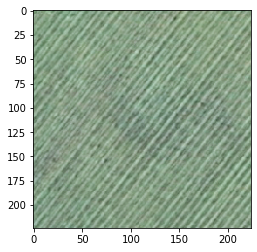

In [10]:
img, x = load_image("/content/image/agricultural/agricultural17.tif")
print("shape of x: ", x.shape)
print("data type: ", x.dtype)
plt.imshow(img)

#ön işlem adımlarını gerçekleştirmek için girdi görüntü (load_image) verdik, VGG16 modelinin beklediği şekilde 224*224 boyutlarında RGB bir görüntüye dönüştürdük. 

In [11]:
# Modelden sınıf tahminleri alma
predictions = model.predict(x) #x'i model üzerinden iletir.

# yazdırma 
for _, pred, prob in decode_predictions(predictions)[0]:
    print("predicted %s with probability %0.3f" % (pred, prob))


40960/35363 [==================================] - 0s 0us/step
predicted window_screen with probability 0.139
predicted tick with probability 0.029
predicted lacewing with probability 0.025
predicted leafhopper with probability 0.019
predicted walking_stick with probability 0.019


In [12]:
#özellik çıkarıcı
feat_extractor = Model(inputs=model.input, outputs=model.get_layer("fc2").output)
feat_extractor.summary()

#modeli son katmanı(sınıflandırma katmanını f2c dense) kaldırarak kopyalamak-- görüntüyü yüksek doğrulukta sınıflandırabilmek için 

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

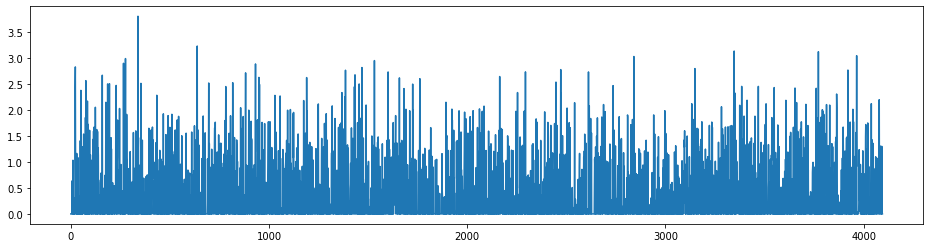

In [14]:
img, x = load_image("/content/image/agricultural/agricultural17.tif")
feat = feat_extractor.predict(x)

plt.figure(figsize=(16,4))
plt.plot(feat[0])

#predict ile görüntü başına bir öge içeren bir dizi döndürür(burda öge=1,uçak) Her öge, VGG16'daki son tam bağlı katman fc2'nin aktivasyonları olan 4096 elemanlı bir dizi içerir.

Beklentimiz, fc2 aktivasyonlarının görüntünün çok iyi bir temsilini oluşturmasıdır, öyle ki benzer görüntüler benzer aktivasyonlar üretmelidir. Yani benzer içeriğe sahip iki görüntünün fc2 aktivasyonları birbirine çok yakın olmalıdır. 

In [15]:
images_path = '/content/image'
image_extensions = ['.jpg', '.png', '.jpeg', '.tif']   
max_num_images = 10000

images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(images_path) for f in filenames if os.path.splitext(f)[1].lower() in image_extensions]
if max_num_images < len(images):
    images = [images[i] for i in sorted(random.sample(xrange(len(images)), max_num_images))]

print("keeping %d images to analyze" % len(images))

keeping 600 images to analyze


In [16]:
import time
tic = time.clock()


features = []
for i, image_path in enumerate(images):
    if i % 100 == 0:
        toc = time.clock()
        elap = toc-tic;
        print("analyzing image %d / %d. Time: %4.4f seconds." % (i, len(images),elap))
        tic = time.clock()
    img, x = load_image(image_path);
    feat = feat_extractor.predict(x)[0]
    features.append(feat)

print('finished extracting features for %d images' % len(images))

#her görüntüyü açan, özellik vektörünü çıkaran ve her görüntü için aktivasyonları içeren bir liste döngüsü, her 100 görüntüde bildirim alıyoruz.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # This is added back by InteractiveShellApp.init_path()


analyzing image 0 / 600. Time: 0.0006 seconds.
analyzing image 100 / 600. Time: 73.8764 seconds.
analyzing image 200 / 600. Time: 74.5621 seconds.
analyzing image 300 / 600. Time: 75.1771 seconds.
analyzing image 400 / 600. Time: 75.2023 seconds.
analyzing image 500 / 600. Time: 75.0790 seconds.
finished extracting features for 600 images


In [17]:
#ilk 300 nesneyi tutacak bir PCA döngüsü başlatmak için
from sklearn.decomposition import PCA

features = np.array(features)
pca = PCA(n_components=300)
pca.fit(features)

#temel bileşen analizi(PCA) koduyla 4096 bitlik özellik vektörünün içindeki fazlalığıyla meydana gelebilecek aşırı benzerliği elemine etmek ve alan/bellek gereksinimlerini en aza indirgemek
#PCA redündansı azaltır, hesaplamayı hızlandırır, kapladığı bellek miktarını azaltır. 

PCA(copy=True, iterated_power='auto', n_components=300, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [18]:
pca_features = pca.transform(features)

#uzunluğu 4096 olan PCA tarafından bulunan 300 boyutlu bir indirgenmiş özellik vektörüne dönüştürebiliriz.

In [19]:
pca_features

array([[-15.972702  , -13.984493  ,   3.2049215 , ...,   0.3047443 ,
         -0.58520436,  -0.48642606],
       [-21.300165  , -20.280884  ,   2.9844282 , ...,  -0.20321934,
         -0.5919212 ,  -0.08433031],
       [-13.945422  , -19.165613  ,  -0.35148793, ...,  -0.6160396 ,
          0.11250108,   0.60391694],
       ...,
       [-15.547423  ,   2.3257518 , -10.222799  , ...,   0.12362857,
          0.7087094 ,   1.4176352 ],
       [-20.294922  , -11.056756  , -10.839044  , ...,   0.2956939 ,
          0.32894313,  -0.5943098 ],
       [-18.853619  ,  -9.780925  ,  -9.364003  , ...,   0.57683194,
          1.8427019 ,  -0.70644075]], dtype=float32)


reverse image query yapmak için gerekli PCA matrisi yazıldı. 
PCA matrisi her görüntü için üst düzey özellik algılamalarına sahip 300 elemanlı bir satır içerir.


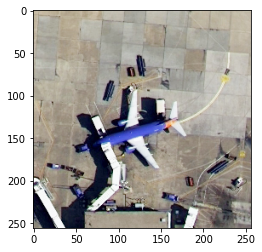

In [20]:
#random bir sorgu görüntüsü alalım
import random

# random bir sorgu görüntüsü alma
query_image_idx = int(len(images) * random.random())

# gösterme
img = image.load_img(images[query_image_idx])
plt.imshow(img)



Benzer içeriğe sahip iki görüntünün benzer özellik vektörleri üretmesi gerekir. Rastgele bir görüntü seçilir ardından bu görüntünün PCA özellik vektörüne mesafesini cos yöntemiyle bulur.

In [21]:
from scipy.spatial import distance

similar_idx = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]

In [30]:
idx_closest = sorted(range(len(similar_idx)), key=lambda k: similar_idx[k])[1:10:2]

#sorgu görüntüsüne en çok benzeyen görüntü, mesafe hesaplamasına dahil edildiğinden, önemsiz bir şekilde sorgu görüntüsünün kendisi olacaktır bu yüzden onu atlayıp [1:6] çalıştırdık.

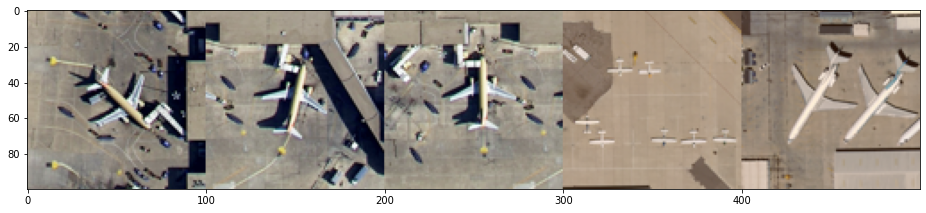

In [31]:
# her bir benzerlik sonucunu 100 piksel yüksekliğinde yükleme
thumbs = []
for idx in idx_closest:
    img = image.load_img(images[idx])
    img = img.resize((int(img.width * 100 / img.height), 100))
    thumbs.append(img)

# görüntüleri tek bir görüntüde birleştirme 
concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)

# resmi gösterme
plt.figure(figsize = (16,12))
plt.imshow(concat_image)

In [32]:
#cos mesafesini hesaplayacak fonksiyon

def get_closest_images(query_image_idx, num_results=3):
    distances = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]
    idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[1:num_results+1]
    return idx_closest

def get_concatenated_images(indexes, thumb_height):
    thumbs = []
    for idx in indexes:
        img = image.load_img(images[idx])
        img = img.resize((int(img.width * thumb_height / img.height), thumb_height))
        thumbs.append(img)
    concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
    return concat_image

Text(0.5, 1.0, 'result images')

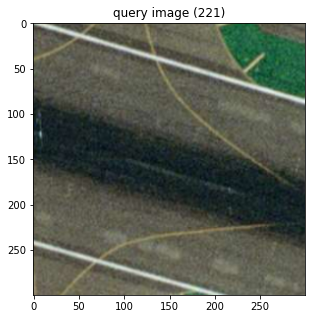

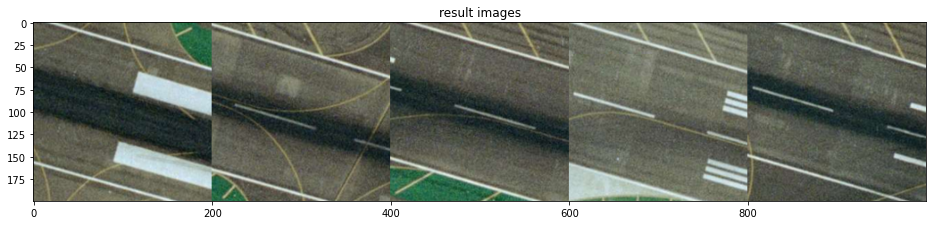

In [33]:
# rastgele bir görüntü üzerinde sorgu yapar
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)

# sorgu görüntüsünü gösterir
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title("query image (%d)" % query_image_idx)

# sonuç görüntüleri gösterir
plt.figure(figsize = (16,12))
plt.imshow(results_image)
plt.title("result images")

Text(0.5, 1.0, 'result images')

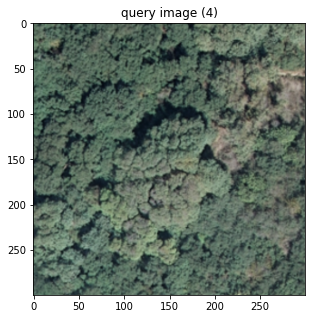

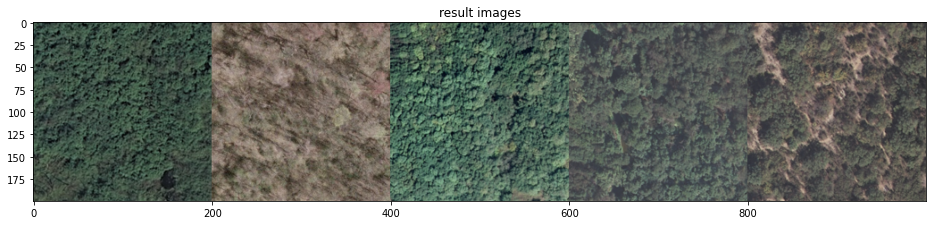

In [ ]:
# rastgele bir görüntü üzerinde sorgu yapar
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)

# sorgu görüntüsünü gösterir
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title("query image (%d)" % query_image_idx)

# sonuç görüntüleri gösterir
plt.figure(figsize = (16,12))
plt.imshow(results_image)
plt.title("result images")

Mounted at /content/gdrive


Text(0.5, 1.0, 'result images')

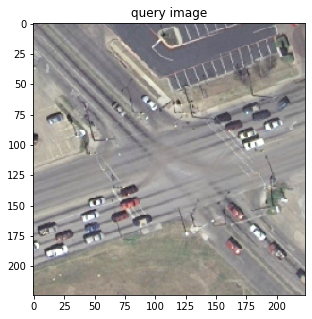

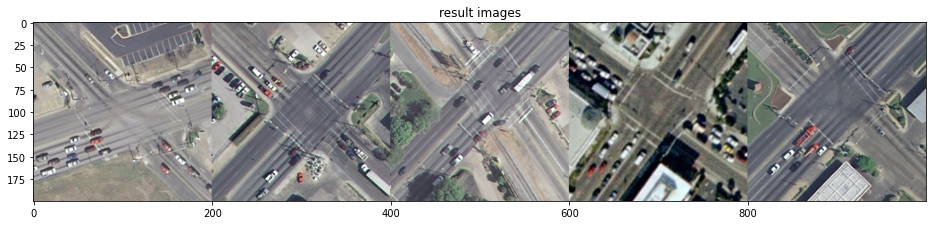

In [ ]:
#analizde olmayan yeni bir görüntüyü yüklemek ve PCA nesnesini için

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# load image and extract features
new_image, x = load_image("/content/image/intersection/intersection17.tif")
new_features = feat_extractor.predict(x)

# project it into pca space
new_pca_features = pca.transform(new_features)[0]

# calculate its distance to all the other images pca feature vectors
distances = [ distance.cosine(new_pca_features, feat) for feat in pca_features ]
idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[0:5]  # grab first 5
results_image = get_concatenated_images(idx_closest, 200)

# display the results
plt.figure(figsize = (5,5))
plt.imshow(new_image)
plt.title("query image")

# display the resulting images
plt.figure(figsize = (16,12))
plt.imshow(results_image)
plt.title("result images")